<a href="https://colab.research.google.com/github/Darapheth/Weather-Trend-Forecast/blob/main/Weather_Trend_Forecasting_Ethan_Darapheth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
!pip uninstall -y torch notebook notebook_shim tensorflow tensorflow-datasets prophet torchaudio torchdata torchtext torchvision

!pip install neuralprophet

!pip install --upgrade plotly

Found existing installation: torchvision 0.20.1+cu121
Uninstalling torchvision-0.20.1+cu121:
  Successfully uninstalled torchvision-0.20.1+cu121
  Using cached neuralprophet-0.9.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached captum-0.7.0-py3-none-any.whl.metadata (26 kB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl.metadata (15 kB)
  Using cached pytorch_lightning-2.5.0.post0-py3-none-any.whl.metadata (21 kB)
  Using cached torch-2.5.1-cp310-cp310-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached torchmetrics-1.6.1-py3-none-any.whl.metadata (21 kB)
  Using cached lightning_utilities-0.11.9-py3-none-any.whl.metadata (5.2 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70

In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


# Read in Data

In [ ]:
df = pd.read_csv('GlobalWeatherRepository.csv')
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [ ]:
df.location_name.unique()

array(['Kabul', 'Tirana', 'Algiers', 'Andorra La Vella', 'Luanda',
       "Saint John's", 'Buenos Aires', 'Yerevan', 'Canberra', 'Vienna',
       'Baku', 'Nassau', 'Manama', 'Dhaka', 'Bridgetown', 'Minsk',
       'Brussels', 'Belmopan', 'Porto-Novo', 'Thimphu', 'Sucre',
       'Sarajevo', 'Gaborone', 'Bras', 'Bandar Seri Begawan', 'Sofia',
       'Ouagadougou', 'Bujumbura', 'Ivory', 'Praia', 'Phnom Penh',
       'Yaounde', 'Ottawa', 'Bangui', "N'djamena", 'Santiago', 'Beijing',
       'Bogot', 'Moroni', 'Brazzaville', 'San Juan', 'Zagreb', 'Havana',
       'Nicosia', 'Prague', 'Kinshasa', 'Copenhagen', 'Djibouti',
       'Roseau', 'Santo Domingo', 'Quito', 'Cairo', 'San Salvador',
       'Malabo', 'Asmara', 'Tallinn', 'Mbabane', 'Addis Ababa', 'Suva',
       'Helsinki', 'Paris', 'Libreville', 'Banjul', 'Tbilisi', 'Berlin',
       'Accra', 'Athens', "Saint George's", 'Guatemala City', 'Conakry',
       'Bissau', 'Georgetown', 'Port-Au-Prince', 'Vatican City',
       'Tegucigalpa', 'Buda

In [ ]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [ ]:
df.dtypes

,0
country,object
location_name,object
latitude,float64
longitude,float64
timezone,object
last_updated_epoch,int64
last_updated,object
temperature_celsius,float64
temperature_fahrenheit,float64
condition_text,object


In [ ]:
Bei = df[df['location_name']=='Beijing']
Bei['last_updated'] = pd.to_datetime(Bei['last_updated'])
Bei.head()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-11-eb82da5b92bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bei['last_updated'] = pd.to_datetime(Bei['last_updated'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bei['last_updated'] = pd.to_datetime(Bei['last_updated'])



,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
36,China,Beijing,39.93,116.39,Asia/Shanghai,1715849100,2024-05-16 16:45:00,29.0,84.2,Sunny,...,84.9,107.8,4,10,04:58 AM,07:24 PM,12:17 PM,01:39 AM,Waxing Gibbous,55
231,China,Beijing,39.93,116.39,Asia/Shanghai,1715868000,2024-05-16 22:00:00,23.0,73.4,Clear,...,228.2,302.1,5,10,04:58 AM,07:24 PM,12:17 PM,01:39 AM,Waxing Gibbous,55
426,China,Beijing,39.93,116.39,Asia/Shanghai,1715961600,2024-05-18 00:00:00,24.0,75.2,Clear,...,221.9,265.9,5,10,04:58 AM,07:25 PM,01:18 PM,02:01 AM,Waxing Gibbous,64
618,China,Beijing,39.93,116.39,Asia/Shanghai,1716042600,2024-05-18 22:30:00,24.0,75.2,Clear,...,171.7,196.4,5,10,04:57 AM,07:26 PM,02:17 PM,02:21 AM,Waxing Gibbous,73
812,China,Beijing,39.93,116.39,Asia/Shanghai,1716127200,2024-05-19 22:00:00,20.0,68.0,Clear,...,43.5,52.3,3,5,04:56 AM,07:27 PM,03:17 PM,02:40 AM,Waxing Gibbous,81


In [ ]:
Bei.dtypes

,0
country,object
location_name,object
latitude,float64
longitude,float64
timezone,object
last_updated_epoch,int64
last_updated,datetime64[ns]
temperature_celsius,float64
temperature_fahrenheit,float64
condition_text,object


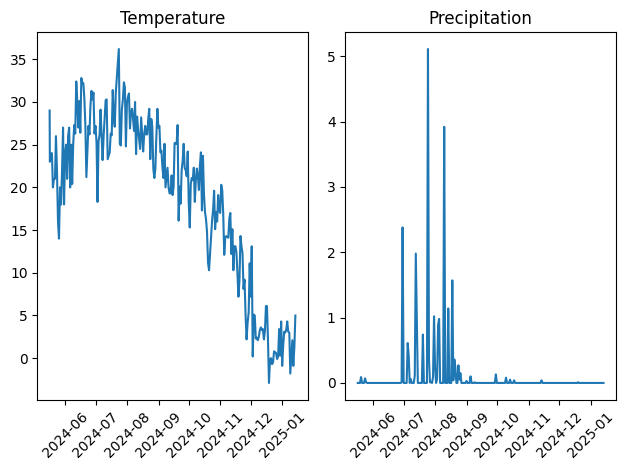

In [ ]:

plt.subplot(1,2,1)
plt.plot(Bei['last_updated'], Bei['temperature_celsius'])
plt.title('Temperature')

plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.plot(Bei['last_updated'], Bei['precip_mm'])
plt.title('Precipitation')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Train Model

In [ ]:
data_precip = Bei[['last_updated', 'precip_mm']]
data_precip.dropna(inplace=True)
data_precip.columns = ['ds', 'y']

data_precip.head()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-13-f57a53ef59fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_precip.dropna(inplace=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_precip.dropna(inplace=True)



,ds,y
36,2024-05-16 16:45:00,0.00
231,2024-05-16 22:00:00,0.00
426,2024-05-18 00:00:00,0.00
618,2024-05-18 22:30:00,0.00
812,2024-05-19 22:00:00,0.09


In [ ]:
data_precip

,ds,y
36,2024-05-16 16:45:00,0.00
231,2024-05-16 22:00:00,0.00
426,2024-05-18 00:00:00,0.00
618,2024-05-18 22:30:00,0.00
812,2024-05-19 22:00:00,0.09
...,...,...
45833,2025-01-08 18:30:00,0.00
46028,2025-01-09 18:30:00,0.00
46223,2025-01-10 18:45:00,0.00
46418,2025-01-11 18:15:00,0.00


In [ ]:
# This Model is fitting precip_mm
m_precip = NeuralProphet()
m_precip.fit(data_precip, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 39.583% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 39.583% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - S

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (15) is too small than the required number                     for the learning rate finder (213). The results might not be optimal.


Finding best initial lr:   0%|          | 0/213 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 16. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.851122,0.0,0.493427,0.662204,0.851122,0.0,0
1,0.752863,0.0,0.444232,0.603176,0.752863,0.0,1
2,0.669923,0.0,0.402880,0.563499,0.669923,0.0,2
3,0.595704,0.0,0.364341,0.535128,0.595704,0.0,3
4,0.532070,0.0,0.331687,0.486431,0.532070,0.0,4
...,...,...,...,...,...,...,...
995,0.146469,0.0,0.104239,0.312801,0.146469,0.0,995
996,0.146484,0.0,0.104275,0.327961,0.146484,0.0,996
997,0.146465,0.0,0.104220,0.305767,0.146465,0.0,997
998,0.146458,0.0,0.104266,0.316825,0.146458,0.0,998


In [ ]:
data_temp = Bei[['last_updated', 'temperature_celsius']]
data_temp.dropna(inplace=True)
data_temp.columns = ['ds', 'y']

data_temp.head()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-12-4b35c3dd4753>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.dropna(inplace=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.dropna(inplace=True)



,ds,y
36,2024-05-16 16:45:00,29.0
231,2024-05-16 22:00:00,23.0
426,2024-05-18 00:00:00,24.0
618,2024-05-18 22:30:00,24.0
812,2024-05-19 22:00:00,20.0


In [ ]:
data_temp

,ds,y
36,2024-05-16 16:45:00,29.0
231,2024-05-16 22:00:00,23.0
426,2024-05-18 00:00:00,24.0
618,2024-05-18 22:30:00,24.0
812,2024-05-19 22:00:00,20.0
...,...,...
45833,2025-01-08 18:30:00,-1.8
46028,2025-01-09 18:30:00,0.2
46223,2025-01-10 18:45:00,2.1
46418,2025-01-11 18:15:00,-0.9


In [ ]:
# This Model is fitting temperature_celsius
m_temp = NeuralProphet()
m_temp.fit(data_temp, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 39.749% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 39.749% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - S

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (15) is too small than the required number                     for the learning rate finder (213). The results might not be optimal.


Finding best initial lr:   0%|          | 0/213 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.906205,0.0,40.472492,48.809082,0.904762,0.0,0
1,0.810834,0.0,36.882034,44.247742,0.810739,0.0,1
2,0.720098,0.0,33.335403,40.336342,0.719551,0.0,2
3,0.631573,0.0,29.871483,36.492558,0.630958,0.0,3
4,0.546990,0.0,26.553902,32.507420,0.546429,0.0,4
...,...,...,...,...,...,...,...
995,0.009157,0.0,2.302099,2.849696,0.009150,0.0,995
996,0.009167,0.0,2.307051,2.841076,0.009185,0.0,996
997,0.009159,0.0,2.306103,2.862916,0.009168,0.0,997
998,0.009161,0.0,2.304386,2.862441,0.009155,0.0,998


# Forecast

## Showing Predictions for both Precipitation and Temperature


### Forecast Temperature in Celsius for the next 700 days.

In [ ]:
future_temp = m_temp.make_future_dataframe(data_temp, periods=700)
forecast_temp = m_temp.predict(future_temp)
forecast_temp.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 39.749% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 39.749% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /usr/loc

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_weekly,season_daily
0,2025-01-13 18:30:00,None,-1.934799,2.984594,-0.496492,-4.422901
1,2025-01-14 18:30:00,None,-2.097376,2.806802,-0.290319,-4.613860
2,2025-01-15 18:30:00,None,-2.298421,2.629011,-0.122975,-4.804457
3,2025-01-16 18:30:00,None,-1.918208,2.451220,0.216732,-4.586160
4,2025-01-17 18:30:00,None,-2.180669,2.273432,0.353665,-4.807765


In [ ]:
plt = m_temp.plot(forecast_temp)
plt.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:98: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The beh

In [ ]:
plt = m_temp.plot_components(forecast_temp)
plt.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:283: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The be

### Forecast Precipitation in mm for the next 700 days.

In [ ]:
future_precip = m_precip.make_future_dataframe(data_precip, periods=700)
forecast_precip = m_precip.predict(future_precip)
forecast_precip.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 39.583% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 39.583% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (py.warnings._showwa

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_weekly,season_daily
0,2025-01-14 18:45:00,None,-0.005522,0.133098,-0.003361,-0.135259
1,2025-01-15 18:45:00,None,0.007063,0.133123,0.001560,-0.127621
2,2025-01-16 18:45:00,None,-0.006239,0.133148,-0.006105,-0.133282
3,2025-01-17 18:45:00,None,0.008321,0.133172,0.007194,-0.132045
4,2025-01-18 18:45:00,None,0.007868,0.133197,0.001271,-0.126599


In [ ]:
plt = m_precip.plot(forecast_precip)
plt.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:98: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)

  fcst = fcst.fillna(value=np.nan)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behav

In [ ]:
plt = m_precip.plot_components(forecast_precip)
plt.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:283: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The be